In [174]:
import cv2
import matplotlib.pyplot as plt
from cv2.typing import *
import numpy as np


def load_image(image_path: str):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


def display_image(image: MatLike, title: str):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    plt.show()


def quantize_image(image: MatLike, n_colors):
    Z = image.reshape((-1, 3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(
        Z, n_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    final_image = res.reshape((image.shape))

    return final_image

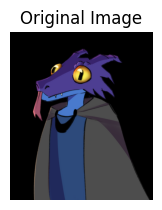

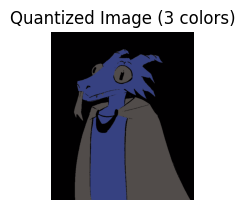

In [175]:
colors = 3
quantized_image = quantize_image(
    load_image(image_path="images/Kraigh.png"), colors)

plt.figure(1)
plt.subplot(223)
display_image(load_image(image_path="images/Kraigh.png"), 'Original Image')

plt.figure(2)
plt.subplot(223)
display_image(quantized_image, f'Quantized Image ({colors} colors)')

In [176]:
def get_colors(image_array, height, width):
    colors = {}
    i = 0
    j = 0
    while i < width:
        while j < height:
            pixel = str(image_array[i, j])
            if pixel in colors:
                colors[pixel] = colors[pixel]+1
            else:
                colors[pixel] = 1
            j = j+1
        j = 0
        i = i+1
    return colors


def get_pallete(colors: dict, percentaje, height, width):
    pallete = {}
    for color in colors.keys():
        if colors[color]/(height*width) > percentaje:
            pallete[color] = colors[color]
    return pallete

In [177]:
image_array = np.array(load_image(image_path="images/Kraigh.png"))
num_rows, num_columns, other = image_array.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 676
Number of columns: 575


In [178]:
colores = get_colors(image_array, num_columns, num_rows)
print(get_colors(image_array, num_columns, num_rows))

{'[0 0 0]': 197791, '[0 0 2]': 86, '[1 0 3]': 20, '[0 0 1]': 224, '[1 0 1]': 41, '[0 0 7]': 15, '[2 1 8]': 9, '[2 1 5]': 22, '[2 1 4]': 32, '[ 2  1 12]': 3, '[0 0 8]': 8, '[5 3 9]': 19, '[3 2 5]': 43, '[10  5 14]': 8, '[12  6 17]': 2, '[ 7  4 10]': 11, '[1 0 2]': 17, '[2 1 3]': 46, '[3 1 3]': 2, '[5 2 7]': 5, '[ 8  5 15]': 9, '[2 0 8]': 5, '[3 1 4]': 1, '[5 3 7]': 10, '[14  7 19]': 5, '[21 11 29]': 6, '[21 11 28]': 1, '[20 10 27]': 4, '[11  6 15]': 14, '[ 8  4 10]': 5, '[7 4 9]': 4, '[6 3 8]': 10, '[ 9  5 13]': 7, '[ 6  1 17]': 1, '[0 0 4]': 42, '[1 0 5]': 20, '[3 1 6]': 5, '[11  5 15]': 1, '[27 15 38]': 2, '[37 19 50]': 3, '[36 19 49]': 4, '[30 15 39]': 1, '[23 12 30]': 7, '[16  8 21]': 8, '[32 17 43]': 4, '[34 18 46]': 5, '[15  7 19]': 2, '[18  9 23]': 2, '[20 11 27]': 5, '[ 8  5 11]': 6, '[ 7  2 11]': 3, '[1 0 8]': 5, '[ 3  1 23]': 1, '[3 1 7]': 3, '[12  6 16]': 7, '[22 11 30]': 2, '[24 13 33]': 4, '[40 21 54]': 5, '[61 32 82]': 2, '[62 32 82]': 3, '[41 21 54]': 1, '[19 10 26]': 5, 

In [179]:
print(get_pallete(colores, 0.05, num_columns, num_rows))

{'[0 0 0]': 197791, '[77 77 77]': 74128, '[ 45  74 123]': 27931}
